### IMPORTING LIBRARIWS WHICH  ARE NEEDED 

In [1]:
pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.10.1-py3-none-any.whl (226 kB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires requests>=2.24.0, which is not installed.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.2.0 which is incompatible.


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from patsy import dmatrices
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc,confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,roc_curve
from sklearn.model_selection import KFold,cross_val_score
from sklearn.model_selection import GridSearchCV
import pickle

## importing data set

In [3]:
data = sm.datasets.fair.load_pandas().data

In [4]:
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


## Creating new dependent variable  

In [5]:
data_new = []
for i in data['affairs']:
    if i > 0:
        data_new.append(1)
    else:
        data_new.append(0)
    

In [6]:
data_new

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [7]:
data['new_dependent_varaible'] = data_new

In [8]:
data


,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,new_dependent_varaible
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000,0


In [9]:
data.drop(['affairs'],axis=1,inplace=True)

### data understanding

In [10]:
data.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'new_dependent_varaible'],
      dtype='object')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   rate_marriage           6366 non-null   float64
 1   age                     6366 non-null   float64
 2   yrs_married             6366 non-null   float64
 3   children                6366 non-null   float64
 4   religious               6366 non-null   float64
 5   educ                    6366 non-null   float64
 6   occupation              6366 non-null   float64
 7   occupation_husb         6366 non-null   float64
 8   new_dependent_varaible  6366 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 447.7 KB


## in above on dtype , there are float d type which has to changed to int


In [12]:
## checking the unique value for each and every columns 
print(data['rate_marriage'].unique())
print(data['children'].unique())
print(data['religious'].unique())
print(data['educ'].unique())
print(data['occupation_husb'].unique())
print(data['occupation'].unique())



[3. 4. 5. 2. 1.]
[3.  0.  4.  1.  5.5 2. ]
[3. 1. 2. 4.]
[17. 14. 16. 12. 20.  9.]
[5. 4. 3. 2. 6. 1.]
[2. 3. 5. 4. 1. 6.]


In [13]:
data.children.value_counts()

0.0    2414
2.0    1481
1.0    1159
3.0     781
4.0     328
5.5     203
Name: children, dtype: int64

In [14]:
data.occupation_husb.value_counts()

4.0    2030
5.0    1779
2.0    1308
6.0     530
3.0     490
1.0     229
Name: occupation_husb, dtype: int64

## while checking the unique values of each and every column i noticed that in chlidern ther is 5.5 value that doest make sense so better to change into 5 cos that is categorical variable

In [15]:
data['children'] = np.floor(data['children'])#floor() function in NumPy is used to return the floor values of each element in an input array x such that for each of the elements of x , the floor values are less than or equal to it.
print(data['children'].unique())## sucessfully changed into categorical variable


[3. 0. 4. 1. 5. 2.]


## Changing data type of categorical variable 


In [16]:
data['children'] = data['children'].astype(int)

In [17]:
data['rate_marriage'] = data['rate_marriage'].astype(int)
data['religious'] = data['religious'].astype(int)
data['educ'] = data['educ'].astype(int)
data['occupation_husb'] = data['occupation_husb'].astype(int)
data['occupation'] = data['occupation'].astype(int)




In [18]:
data.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,new_dependent_varaible
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.380930,2.426170,14.209865,3.424128,3.850141,0.322495
std,0.961430,6.847882,7.280120,1.389855,0.878369,2.178003,0.942399,1.346435,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,1.000000
max,5.000000,42.000000,23.000000,5.000000,4.000000,20.000000,6.000000,6.000000,1.000000


In [19]:
data.isnull().sum()

rate_marriage             0
age                       0
yrs_married               0
children                  0
religious                 0
educ                      0
occupation                0
occupation_husb           0
new_dependent_varaible    0
dtype: int64

## Exploratory data analysis 

<AxesSubplot: ylabel='new_dependent_varaible'>

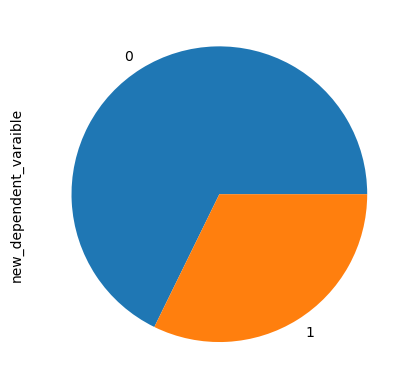

In [20]:
data['new_dependent_varaible'].value_counts().plot(kind = 'pie')

<AxesSubplot: >

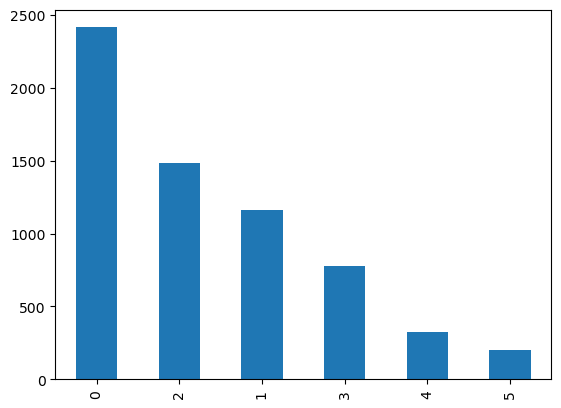

In [21]:
data['children'].value_counts().plot(kind = "bar")

<AxesSubplot: >

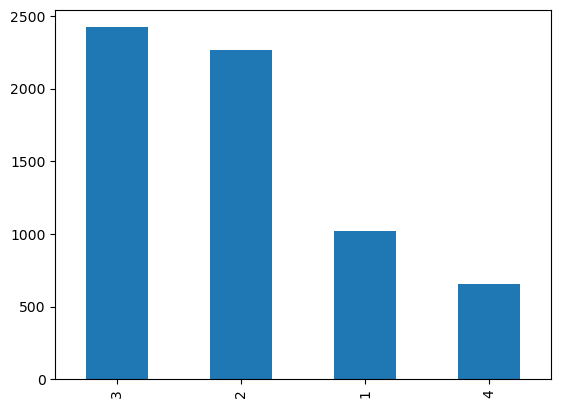

In [22]:
data['religious'].value_counts().plot(kind = 'bar')

<AxesSubplot: >

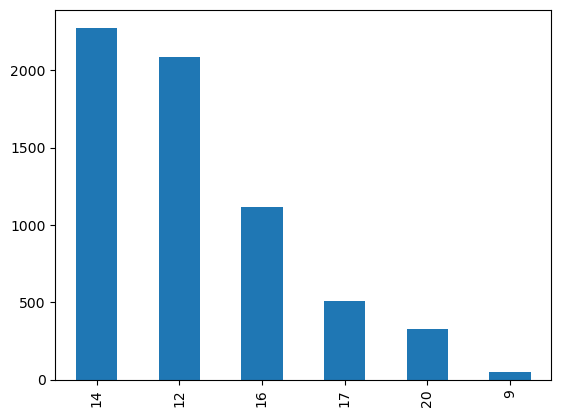

In [23]:
data['educ'].value_counts().plot(kind= 'bar')

<AxesSubplot: >

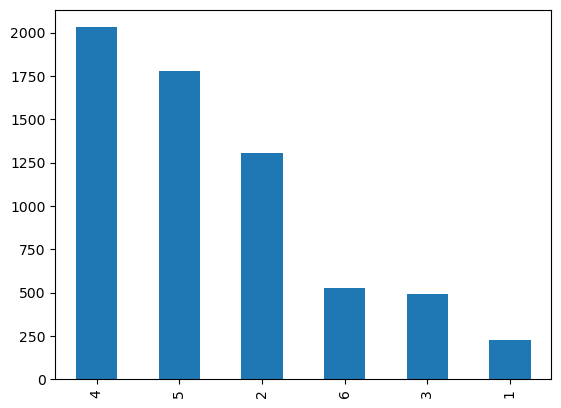

In [24]:
data['occupation_husb'].value_counts().plot(kind='bar')

<AxesSubplot: >

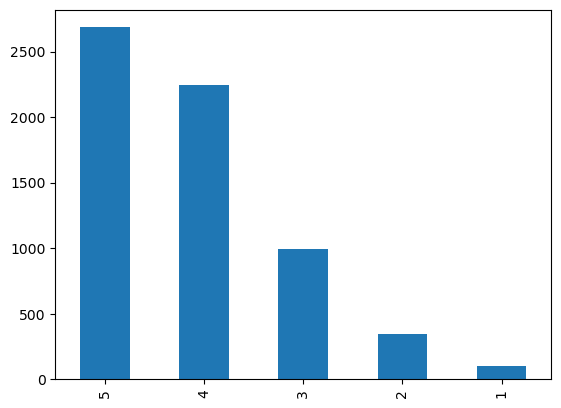

In [25]:
data['rate_marriage'].value_counts().plot(kind='bar')

/tmp/ipykernel_102/1018354820.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'],hist=False)


<AxesSubplot: xlabel='age', ylabel='Density'>

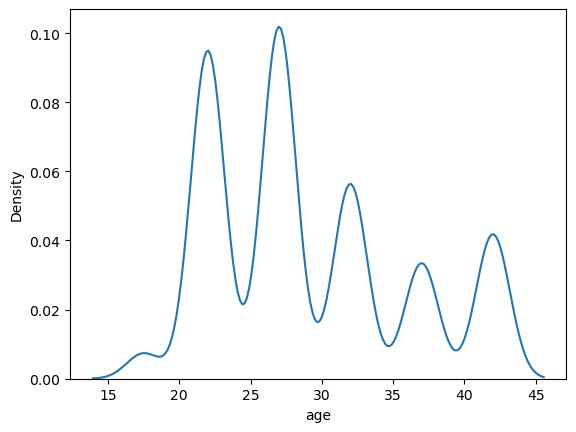

In [26]:
sns.distplot(data['age'],hist=False)

/tmp/ipykernel_102/814901678.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['yrs_married'],hist=False)


<AxesSubplot: xlabel='yrs_married', ylabel='Density'>

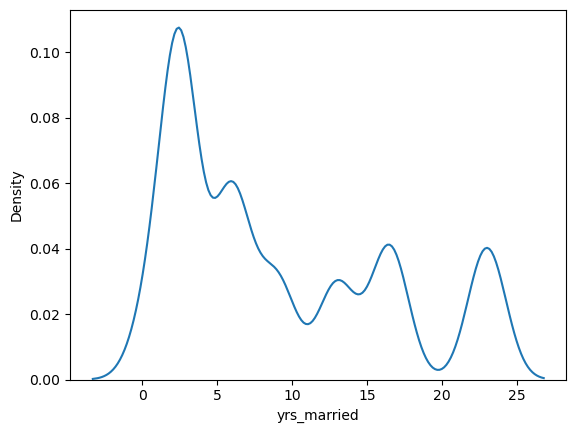

In [27]:
sns.distplot(data['yrs_married'],hist=False)

<AxesSubplot: >

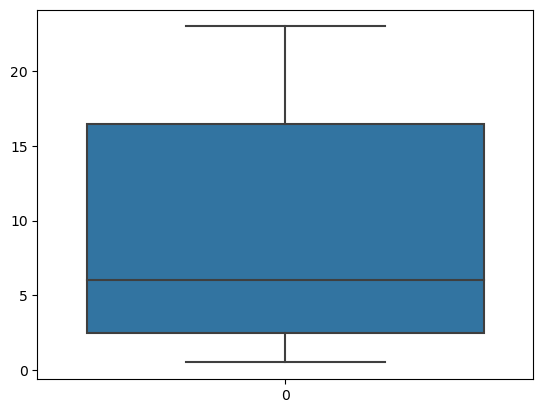

In [28]:
sns.boxplot(data['yrs_married'])

<AxesSubplot: >

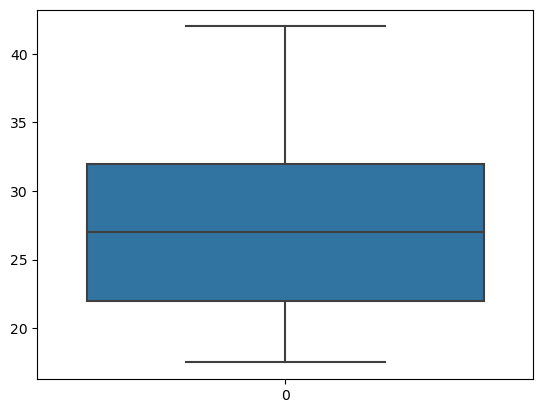

In [29]:
sns.boxplot(data['age'])

In [30]:
data['new_dependent_varaible'].value_counts()

0    4313
1    2053
Name: new_dependent_varaible, dtype: int64

In [31]:
data.corr()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,new_dependent_varaible
rate_marriage,1.000000,-0.111127,-0.128978,-0.131083,0.078794,0.079869,0.039528,0.027745,-0.331776
age,-0.111127,1.000000,0.894082,0.678030,0.136598,0.027960,0.106127,0.162567,0.146519
yrs_married,-0.128978,0.894082,1.000000,0.778553,0.132683,-0.109058,0.041782,0.128135,0.203109
children,-0.131083,0.678030,0.778553,1.000000,0.141760,-0.143294,-0.015055,0.088103,0.163212
religious,0.078794,0.136598,0.132683,0.141760,1.000000,0.032245,0.035746,0.004061,-0.129299
educ,0.079869,0.027960,-0.109058,-0.143294,0.032245,1.000000,0.382286,0.183932,-0.075280
occupation,0.039528,0.106127,0.041782,-0.015055,0.035746,0.382286,1.000000,0.201156,0.028981
occupation_husb,0.027745,0.162567,0.128135,0.088103,0.004061,0.183932,0.201156,1.000000,0.017637
new_dependent_varaible,-0.331776,0.146519,0.203109,0.163212,-0.129299,-0.075280,0.028981,0.017637,1.000000


<AxesSubplot: >

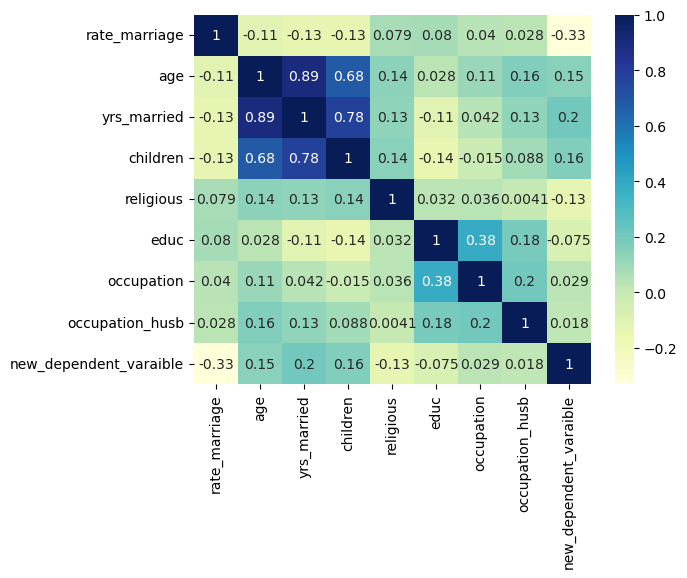

In [32]:
sns.heatmap(data.corr(),cmap="YlGnBu", annot=True)

## as the three features are highly correlated example age, yrs_married and childerns has highly correlatex  

In [33]:
data.drop(['age'],axis=1,inplace= True)

In [34]:
data.head()

,rate_marriage,yrs_married,children,religious,educ,occupation,occupation_husb,new_dependent_varaible
0,3,9.0,3,3,17,2,5,1
1,3,13.0,3,1,14,3,4,1
2,4,2.5,0,1,16,3,5,1
3,4,16.5,4,3,16,5,5,1
4,5,9.0,1,1,14,3,4,1


### as the data set is imblanced to doing it into balace


In [35]:
X=data.drop(['new_dependent_varaible'],axis=1)

In [36]:
X

,rate_marriage,yrs_married,children,religious,educ,occupation,occupation_husb
0,3,9.0,3,3,17,2,5
1,3,13.0,3,1,14,3,4
2,4,2.5,0,1,16,3,5
3,4,16.5,4,3,16,5,5
4,5,9.0,1,1,14,3,4
...,...,...,...,...,...,...,...
6361,5,13.0,2,3,17,4,3
6362,4,13.0,1,1,16,5,5
6363,5,2.5,0,2,14,3,1
6364,5,6.0,1,3,14,3,4


In [37]:
y  = data['new_dependent_varaible']

In [38]:
y

0       1
1       1
2       1
3       1
4       1
       ..
6361    0
6362    0
6363    0
6364    0
6365    0
Name: new_dependent_varaible, Length: 6366, dtype: int64

<AxesSubplot: ylabel='new_dependent_varaible'>

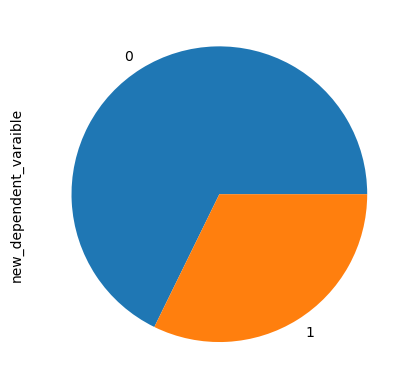

In [39]:
y.value_counts().plot(kind = 'pie')

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=40,test_size=0.20)

In [41]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(5092, 7) (5092,) (1274, 7) (1274,)


In [42]:
X_balanced ,y_balanced = SMOTE().fit_resample(X_train,y_train)

In [43]:
X_balanced

,rate_marriage,yrs_married,children,religious,educ,occupation,occupation_husb
0,4,6.0,1,3,14,3,4
1,1,23.0,3,2,12,3,2
2,5,2.5,0,1,16,4,5
3,5,0.5,0,3,14,3,4
4,5,6.0,1,2,12,2,4
...,...,...,...,...,...,...,...
6871,4,2.5,1,1,12,2,2
6872,2,13.0,2,3,12,3,3
6873,4,13.0,1,2,12,3,3
6874,5,23.0,2,1,14,5,5


### The data set is balanced 

<AxesSubplot: >

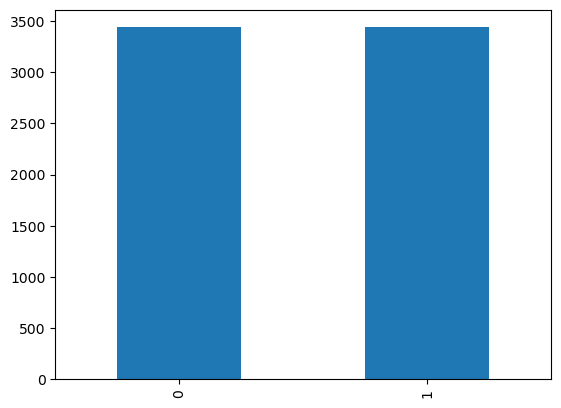

In [44]:
y_balanced.value_counts().plot(kind='bar')

## scaling the data set to get better results

In [45]:
sc = StandardScaler()
X_train_transform = sc.fit_transform(X_balanced)

In [46]:
X_train_transform

array([[ 0.07642051, -0.49296567, -0.30295531, ..., -0.05509679,
        -0.41338998,  0.15188265],
       [-2.84284286,  1.82176575,  1.18127747, ..., -0.99399528,
        -0.41338998, -1.35293743],
       [ 1.0495083 , -0.96952802, -1.0450717 , ...,  0.88380169,
         0.67567879,  0.9042927 ],
       ...,
       [ 0.07642051,  0.46015903, -0.30295531, ..., -0.99399528,
        -0.41338998, -0.60052739],
       [ 1.0495083 ,  1.82176575,  0.43916108, ..., -0.05509679,
         1.76474755,  0.9042927 ],
       [ 0.07642051,  0.46015903,  0.43916108, ..., -0.05509679,
        -0.41338998,  0.9042927 ]])

In [47]:
X_transform_testing = sc.transform(X_test)

In [48]:
X_transform_testing

array([[ 0.07642051, -0.96952802, -0.30295531, ..., -0.05509679,
        -0.41338998,  0.9042927 ],
       [-1.86975507,  0.93672138,  0.43916108, ..., -0.99399528,
        -0.41338998, -1.35293743],
       [ 0.07642051, -0.96952802,  0.43916108, ..., -0.05509679,
        -1.50245874, -1.35293743],
       ...,
       [ 1.0495083 ,  1.82176575,  2.66551026, ..., -0.99399528,
        -0.41338998,  0.9042927 ],
       [ 1.0495083 , -0.96952802, -1.0450717 , ..., -0.05509679,
        -0.41338998,  0.9042927 ],
       [ 0.07642051, -0.96952802, -1.0450717 , ..., -0.05509679,
         0.67567879,  0.15188265]])

In [49]:
X_transform_traning = sc.transform(X_balanced)

## Model Traning

In [50]:
logistic = LogisticRegression()
logistic.fit(X_train_transform,y_balanced)

LogisticRegression()

In [51]:
logistic_test_pred = logistic.predict(X_transform_testing)

In [52]:
confusion_matrix(logistic_test_pred,y_test)

array([[647, 161],
       [228, 238]])

In [53]:
accuracy_score(logistic_test_pred,y_test)

0.6946624803767661

In [54]:
logistic_traning_pred = logistic.predict(X_train_transform)

In [55]:
accuracy_score(logistic_traning_pred,y_balanced)

0.705933682373473

In [56]:
confusion_matrix(logistic_traning_pred,y_balanced)

array([[2515, 1099],
       [ 923, 2339]])

In [57]:
precision_score(logistic_traning_pred,y_balanced)

0.6803374054682956

In [58]:
recall_score(logistic_traning_pred,y_balanced)

0.71704475781729

In [59]:
precision_score(logistic_test_pred,y_test)

0.5964912280701754

In [60]:
recall_score(logistic_test_pred,y_test)

0.5107296137339056

In [61]:
f1_score(logistic_test_pred,y_test)

0.5502890173410404

<AxesSubplot: >

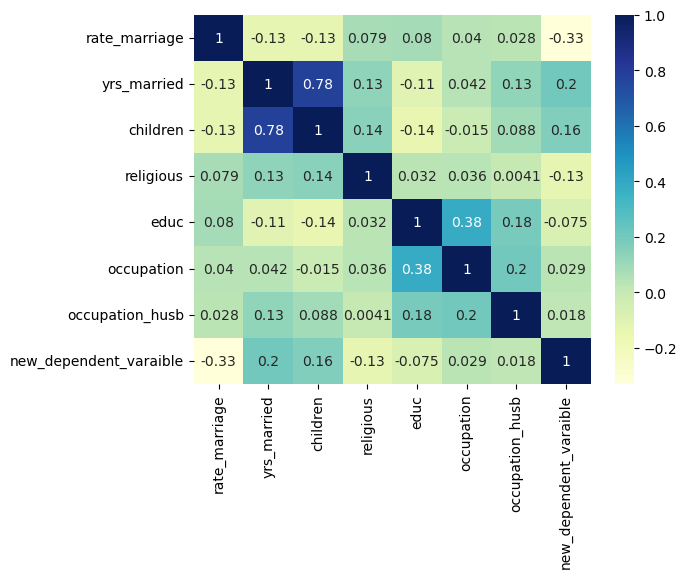

In [62]:
sns.heatmap(data.corr(),cmap="YlGnBu", annot=True)

In [63]:
data.skew()

rate_marriage            -1.009710
yrs_married               0.725854
children                  0.746945
religious                -0.028350
educ                      0.794714
occupation                0.343946
occupation_husb          -0.380442
new_dependent_varaible    0.759673
dtype: float64

## model traning using kfold cross 

In [64]:
#logistic_grid_search = cross_val_score(logistic,X_train_transform,y_balanced,scoring='',cv=5,)

In [65]:
parameter = {'C':[0.0001,0.001,0.1,0,2,0.35,0.5,1,2,3,4,10,22,50,100,60,80],'penalty':['l1','l2',',elasticnet']}

In [66]:
logistic_regression_grid_search = GridSearchCV(logistic,parameter,scoring="precision",cv=10)

In [67]:
logistic_regression_grid_search.fit(X_train_transform,y_balanced)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
350 fits failed out of a total of 510.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
170 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 61, in _check_solver
    raise ValueError(
ValueError: So

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.0001, 0.001, 0.1, 0, 2, 0.35, 0.5, 1, 2, 3, 4,
                               10, 22, 50, 100, 60, 80],
                         'penalty': ['l1', 'l2', ',elasticnet']},
             scoring='precision')

In [68]:
print(logistic_regression_grid_search.best_params_)

{'C': 0.35, 'penalty': 'l2'}


In [69]:
print(logistic_regression_grid_search.best_score_)

0.71535041713362


In [70]:
logistic_testing_gs = logistic_regression_grid_search.predict(X_transform_testing)

In [71]:
confusion_matrix(logistic_testing_gs,y_test)

array([[649, 161],
       [226, 238]])

In [72]:
accuracy_score(logistic_testing_gs,y_test)

0.6962323390894819

In [73]:
precision_score(logistic_testing_gs,y_test)

0.5964912280701754

In [74]:
recall_score(logistic_testing_gs,y_test)

0.5129310344827587

In [75]:
logistic_cv_search = cross_val_score(logistic,X_train_transform,y_balanced,scoring='precision',cv=10)

In [76]:
logistic_cv_search.mean()

0.7151223515434244

## accuracy is not much expected to trying to go with more analysis

<AxesSubplot: >

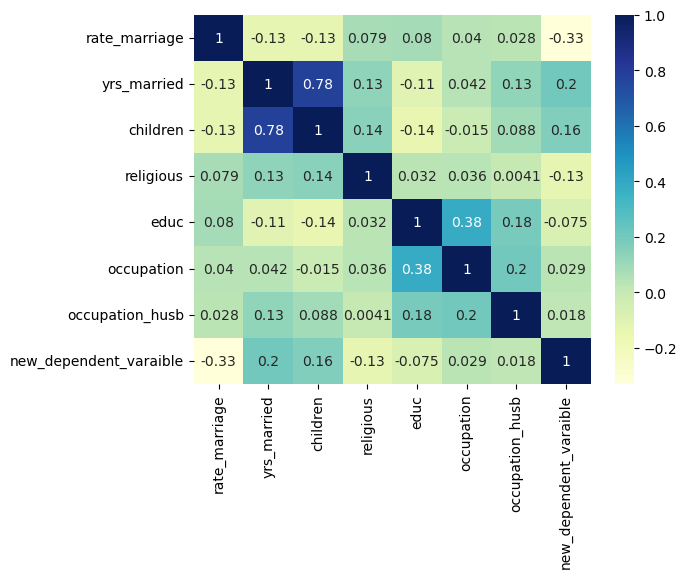

In [77]:
sns.heatmap(data.corr(),cmap="YlGnBu", annot=True)

In [78]:
data1 = data.copy()

In [79]:
data1.columns

Index(['rate_marriage', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'new_dependent_varaible'],
      dtype='object')

In [80]:
data1.drop(['yrs_married'],axis=1,inplace=True)

In [81]:
data1

,rate_marriage,children,religious,educ,occupation,occupation_husb,new_dependent_varaible
0,3,3,3,17,2,5,1
1,3,3,1,14,3,4,1
2,4,0,1,16,3,5,1
3,4,4,3,16,5,5,1
4,5,1,1,14,3,4,1
...,...,...,...,...,...,...,...
6361,5,2,3,17,4,3,0
6362,4,1,1,16,5,5,0
6363,5,0,2,14,3,1,0
6364,5,1,3,14,3,4,0


In [82]:
data1.columns

Index(['rate_marriage', 'children', 'religious', 'educ', 'occupation',
       'occupation_husb', 'new_dependent_varaible'],
      dtype='object')

In [83]:
X1 = data1.drop(['new_dependent_varaible'],axis=1)

In [84]:
X1

,rate_marriage,children,religious,educ,occupation,occupation_husb
0,3,3,3,17,2,5
1,3,3,1,14,3,4
2,4,0,1,16,3,5
3,4,4,3,16,5,5
4,5,1,1,14,3,4
...,...,...,...,...,...,...
6361,5,2,3,17,4,3
6362,4,1,1,16,5,5
6363,5,0,2,14,3,1
6364,5,1,3,14,3,4


In [85]:
y1 = data['new_dependent_varaible']

In [86]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,y1,random_state=42,test_size=0.20)

In [87]:
print(X_train1.shape,X_test1.shape,y_train1.shape,y_test1.shape)

(5092, 6) (1274, 6) (5092,) (1274,)


In [88]:
X_balanced1 ,y_balanced1 = SMOTE().fit_resample(X_train1,y_train1)

In [89]:
y_balanced1.value_counts()

1    3464
0    3464
Name: new_dependent_varaible, dtype: int64

In [90]:
X_transform_train1  = sc.fit_transform(X_balanced1)

In [91]:
X_transform1_test = sc.transform(X_test1)

In [92]:
X_transform1_test

array([[ 0.03534279,  1.88856013,  1.91853196,  0.86435174,  0.62053865,
         0.14503648],
       [-0.95197518,  1.15671403, -0.40801966, -1.00230314,  0.62053865,
         0.89433752],
       [ 0.03534279, -1.03882427, -0.40801966, -0.0689757 , -0.44096549,
        -1.35356562],
       ...,
       [ 0.03534279,  1.15671403,  1.91853196, -0.0689757 , -1.50246964,
         0.14503648],
       [-0.95197518, -0.30697817,  0.75525615,  0.86435174,  2.74354695,
         0.14503648],
       [-0.95197518, -1.03882427, -0.40801966, -0.0689757 ,  0.62053865,
        -1.35356562]])

In [93]:
X_transform_train1

array([[-0.95197518,  0.42486793, -0.40801966, -1.00230314, -1.50246964,
         0.14503648],
       [ 0.03534279, -1.03882427, -1.57129547, -1.00230314, -0.44096549,
        -0.60426457],
       [ 1.02266076,  1.15671403,  0.75525615,  1.33101546,  0.62053865,
         0.89433752],
       ...,
       [-1.93929315, -0.30697817,  0.75525615, -1.00230314,  1.6820428 ,
         0.89433752],
       [-0.95197518, -0.30697817, -0.40801966, -1.00230314, -0.44096549,
         0.14503648],
       [ 0.03534279, -0.30697817, -0.40801966,  0.86435174, -0.44096549,
         0.89433752]])

In [94]:
logistic_prediction1 = logistic.fit(X_transform_train1,y_balanced1)

In [95]:
logistic_prediction_testing_1 = logistic_prediction1.predict(X_transform1_test)

In [96]:
accuracy_score(logistic_prediction_testing_1,y_test1)

0.6891679748822606

In [97]:
precision_score(logistic_prediction_testing_1,y_test1)

0.68

In [98]:
recall_score(logistic_prediction_testing_1,y_test1)

0.5264116575591985

In [99]:
confusion_matrix(logistic_prediction_testing_1,y_test1)

array([[589, 136],
       [260, 289]])

## Applying grid search cv 

In [100]:
parameter = {'C':[0.00001,0.0001,0.001,0.1,0.10,0.50,1,5,10,15,20,30,40,50,60,110,200,],'penalty':['l1','l2','elasticnet']}

In [101]:
logistic1_search_cv = GridSearchCV(logistic,parameter,scoring='precision',cv=5)

In [102]:
logistic1_search_cv.fit(X_transform_train1,y_balanced1)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
170 fits failed out of a total of 255.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
85 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 61, in _check_solver
    raise ValueError(
ValueError: Sol

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.1, 0.1, 0.5, 1, 5, 10,
                               15, 20, 30, 40, 50, 60, 110, 200],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='precision')

In [103]:
logistic1_search_cv.best_params_

{'C': 0.001, 'penalty': 'l2'}

In [104]:
logistic1_search_cv.best_score_

0.7004424759561201

In [105]:
logistic_test_1 = logistic1_search_cv.predict(X_transform1_test)

In [106]:
precision_score(logistic_test_1,y_test1)

0.6705882352941176

In [107]:
confusion_matrix(logistic_test_1,y_test1)

array([[597, 140],
       [252, 285]])

In [108]:
accuracy_score(logistic_test_1,y_test1)

0.6923076923076923

In [109]:
roc_curve(y_test1,logistic_test_1)

(array([0.        , 0.29681979, 1.        ]),
 array([0.        , 0.67058824, 1.        ]),
 array([2, 1, 0]))

In [110]:
parameter_1= {'C':[0.00001,0.0001,0.001,0.1,0.10,0.50,1,5,10,15,20,30,40,50,60,110,200,],'penalty':['l1','l2','elasticnet']}

In [111]:
logistic1_search_cv10 = GridSearchCV(logistic,parameter,scoring='precision',cv=10)

In [112]:
logistic1_search_cv10.fit(X_transform_train1,y_balanced1)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
340 fits failed out of a total of 510.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
170 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 61, in _check_solver
    raise ValueError(
ValueError: So

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.1, 0.1, 0.5, 1, 5, 10,
                               15, 20, 30, 40, 50, 60, 110, 200],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='precision')

In [113]:
logistic1_search_cv10.best_params_

{'C': 0.001, 'penalty': 'l2'}

In [114]:
logistic1_search_cv10.best_score_

0.7001443518332223

In [115]:
logistic_test_10 = logistic1_search_cv10.predict(X_transform1_test)

In [116]:
precision_score(logistic_test_10,y_test1)

0.6705882352941176

In [117]:
data_2 = data.copy()

In [118]:
data_2

,rate_marriage,yrs_married,children,religious,educ,occupation,occupation_husb,new_dependent_varaible
0,3,9.0,3,3,17,2,5,1
1,3,13.0,3,1,14,3,4,1
2,4,2.5,0,1,16,3,5,1
3,4,16.5,4,3,16,5,5,1
4,5,9.0,1,1,14,3,4,1
...,...,...,...,...,...,...,...,...
6361,5,13.0,2,3,17,4,3,0
6362,4,13.0,1,1,16,5,5,0
6363,5,2.5,0,2,14,3,1,0
6364,5,6.0,1,3,14,3,4,0


In [119]:
#import pickle

In [120]:
#file = 'logistic_sav'
#pickle.dump(logistic_prediction1,open(file,'wb'))

In [121]:
#data  = np.array([3,3,3,17,2,5]).reshape(1,-1)

In [122]:
#model = pickle.load(open('logistic_sav','rb'))

In [123]:
#model.predict()

## AS THE ACCURACY IS NOT GOOD TRYING TO PREDICT WITH DIFFERENT DIFFERNET VAIRABLES

In [124]:
data_new_1 = sm.datasets.fair.load_pandas().data

In [125]:
data_new_12 = []
for i in data_new_1['affairs']:
    if i > 0:
        data_new_12.append(1)
    else:
        data_new_12.append(0)

In [126]:
data_new_1['dependent_variable'] = data_new_12

In [127]:
data_new_1

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,dependent_variable
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000,0


In [128]:
data_age = data_new_1.copy()

In [129]:
data_age

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,dependent_variable
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000,0


In [130]:
data_age.drop(['yrs_married','children','affairs'],axis=1,inplace=True)

In [131]:
X_age = data_age.drop('dependent_variable',axis=1)

In [132]:
X_age

,rate_marriage,age,religious,educ,occupation,occupation_husb
0,3.0,32.0,3.0,17.0,2.0,5.0
1,3.0,27.0,1.0,14.0,3.0,4.0
2,4.0,22.0,1.0,16.0,3.0,5.0
3,4.0,37.0,3.0,16.0,5.0,5.0
4,5.0,27.0,1.0,14.0,3.0,4.0
...,...,...,...,...,...,...
6361,5.0,32.0,3.0,17.0,4.0,3.0
6362,4.0,32.0,1.0,16.0,5.0,5.0
6363,5.0,22.0,2.0,14.0,3.0,1.0
6364,5.0,32.0,3.0,14.0,3.0,4.0


In [133]:
y_age = data_new_1['dependent_variable']

In [134]:
y_age

0       1
1       1
2       1
3       1
4       1
       ..
6361    0
6362    0
6363    0
6364    0
6365    0
Name: dependent_variable, Length: 6366, dtype: int64

In [135]:
X_train_age ,X_test_age,y_train_age,y_test_age = train_test_split(X_age,y_age,random_state=42,test_size=0.15)

In [136]:
print(X_train_age.shape,X_test_age.shape,y_train_age.shape,y_test_age.shape)

(5411, 6) (955, 6) (5411,) (955,)


In [137]:
X_train_age_balanced,y_train_age_balanced = SMOTE().fit_resample(X_train_age,y_train_age)

In [138]:
y_train_age_balanced.value_counts()

0    3674
1    3674
Name: dependent_variable, dtype: int64

In [139]:
X_train_age

,rate_marriage,age,religious,educ,occupation,occupation_husb
3753,4.0,27.0,4.0,17.0,5.0,5.0
6000,4.0,22.0,2.0,12.0,2.0,2.0
3960,3.0,27.0,2.0,14.0,3.0,4.0
1467,3.0,42.0,4.0,14.0,3.0,5.0
6311,5.0,32.0,4.0,20.0,4.0,5.0
...,...,...,...,...,...,...
3772,3.0,32.0,1.0,14.0,3.0,6.0
5191,4.0,22.0,2.0,16.0,4.0,5.0
5226,5.0,27.0,1.0,17.0,4.0,6.0
5390,5.0,32.0,3.0,16.0,5.0,6.0


In [140]:
X_train_age_balanced_transform = sc.fit_transform(X_train_age_balanced)

In [141]:
X_train_age_balanced_transform

array([[ 0.01315107, -0.35610505,  1.89023673,  1.32799129,  1.68669332,
         0.86619809],
       [ 0.01315107, -1.08542661, -0.4597599 , -1.01431668, -1.55460603,
        -1.39470715],
       [-0.99119442, -0.35610505, -0.4597599 , -0.07739349, -0.47417291,
         0.11256301],
       ...,
       [-0.31090116,  1.83185963, -1.63475822, -0.07739349, -0.47417291,
         0.11256301],
       [ 1.01749657,  0.37321651, -0.4597599 , -0.07739349,  0.6062602 ,
         0.11256301],
       [ 0.62410512, -0.35610505, -0.4597599 , -1.01431668, -0.47417291,
         1.61983317]])

In [142]:
X_test_age_transform = sc.transform(X_test_age)

In [143]:
X_test_age_transform

array([[ 0.01315107,  1.83185963,  1.89023673,  0.8595297 ,  0.6062602 ,
         0.11256301],
       [-0.99119442, -0.35610505, -0.4597599 , -1.01431668,  0.6062602 ,
         0.86619809],
       [ 0.01315107, -1.08542661, -0.4597599 , -0.07739349, -0.47417291,
        -1.39470715],
       ...,
       [-0.99119442, -0.35610505,  0.71523842, -1.01431668, -1.55460603,
        -1.39470715],
       [ 1.01749657, -0.35610505,  0.71523842, -1.01431668, -0.47417291,
        -0.64107207],
       [ 1.01749657,  0.37321651,  0.71523842, -0.07739349,  0.6062602 ,
         1.61983317]])

In [144]:
logistic_age = logistic.fit(X_train_age_balanced_transform,y_train_age_balanced)

In [145]:
test_prediction_results_age =  logistic_age.predict(X_test_age_transform)

In [146]:
confusion_matrix(test_prediction_results_age,y_test_age)

array([[449, 102],
       [190, 214]])

In [147]:
accuracy_score(test_prediction_results_age,y_test_age)

0.694240837696335

In [148]:
precision_score(test_prediction_results_age,y_test_age)

0.6772151898734177

In [149]:
recall_score(test_prediction_results_age,y_test_age)

0.5297029702970297

In [150]:
parameters_age = {'C':[0.0001,0.001,0.01,1, 2,3, 4,10,15,20,30,40,50,60,70,80,90,100,200,500,1000,10000,1000000],'penalty':['l1','l2','elasticnet']}

In [151]:
Logistic_age_grid = GridSearchCV(logistic,parameters_age,scoring='precision',cv=5)
Logistic_age_grid.fit(X_train_age_balanced_transform,y_train_age_balanced)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
230 fits failed out of a total of 345.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
115 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 61, in _check_solver
    raise ValueError(
ValueError: So

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.0001, 0.001, 0.01, 1, 2, 3, 4, 10, 15, 20, 30,
                               40, 50, 60, 70, 80, 90, 100, 200, 500, 1000,
                               10000, 1000000],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='precision')

In [152]:
Logistic_age_grid.best_params_

{'C': 0.0001, 'penalty': 'l2'}

In [153]:
Logistic_age_grid.best_score_

0.683153381594575

In [154]:
Logistic_age_grid_test = Logistic_age_grid.predict(X_test_age_transform)

In [155]:
confusion_matrix(Logistic_age_grid_test,y_test_age)

array([[447, 107],
       [192, 209]])

In [156]:
accuracy_score(Logistic_age_grid_test,y_test_age)

0.6869109947643979

In [157]:
precision_score(Logistic_age_grid_test,y_test_age)

0.6613924050632911

In [158]:
recall_score(Logistic_age_grid_test,y_test_age)

0.5211970074812967

In [159]:
f1_score(Logistic_age_grid_test,y_test_age)

0.5829846582984658

## checking with yrs_married 

In [160]:
data_ym = data_new_1.copy()

In [161]:
data_ym

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,dependent_variable
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000,0


In [162]:
data_ym.drop(['age','children','affairs'],axis=1,inplace=True)

In [163]:
data_ym

,rate_marriage,yrs_married,religious,educ,occupation,occupation_husb,dependent_variable
0,3.0,9.0,3.0,17.0,2.0,5.0,1
1,3.0,13.0,1.0,14.0,3.0,4.0,1
2,4.0,2.5,1.0,16.0,3.0,5.0,1
3,4.0,16.5,3.0,16.0,5.0,5.0,1
4,5.0,9.0,1.0,14.0,3.0,4.0,1
...,...,...,...,...,...,...,...
6361,5.0,13.0,3.0,17.0,4.0,3.0,0
6362,4.0,13.0,1.0,16.0,5.0,5.0,0
6363,5.0,2.5,2.0,14.0,3.0,1.0,0
6364,5.0,6.0,3.0,14.0,3.0,4.0,0


In [164]:
X_ym = data_ym.drop('dependent_variable',axis=1)

In [165]:
y_ym = data_ym['dependent_variable']

In [166]:
X_train_ym,X_test_ym,y_train_ym,y_test_ym = train_test_split(X_ym,y_ym,random_state=42,test_size=0.15)

In [167]:
print(X_train_ym.shape,X_test_ym.shape,y_train_ym.shape,y_test_ym.shape)

(5411, 6) (955, 6) (5411,) (955,)


In [168]:
X_train_ym_balanced,y_train_ym_balanced = SMOTE().fit_resample(X_train_ym,y_train_ym)

In [169]:
y_train_ym_balanced.value_counts()

0    3674
1    3674
Name: dependent_variable, dtype: int64

In [170]:
X_train_ym_balanced_transform = sc.fit_transform(X_train_ym_balanced)

In [171]:
X_train_ym_balanced_transform

array([[ 0.00597186, -0.94825829,  1.90988369,  1.33843471,  1.68529544,
         0.87841268],
       [ 0.00597186, -1.22016269, -0.43318826, -1.01782518, -1.55738514,
        -1.38047453],
       [-1.01307557, -0.47242559, -0.43318826, -0.07532122, -0.47649161,
         0.12545027],
       ...,
       [ 1.02501929, -0.06456898, -0.43318826, -0.07532122, -0.47649161,
         0.12545027],
       [ 1.02501929,  0.47923982, -0.43318826, -0.07532122,  1.68529544,
        -0.11193526],
       [ 1.02501929, -0.94825829, -1.42992023, -0.07532122, -1.39610583,
         0.12545027]])

In [172]:
X_test_ym_transform = sc.transform(X_test_ym)

In [173]:
X_test_ym_transform

array([[ 0.00597186,  1.83876184,  1.90988369,  0.86718273,  0.60440191,
         0.12545027],
       [-1.01307557, -0.06456898, -0.43318826, -1.01782518,  0.60440191,
         0.87841268],
       [ 0.00597186, -0.94825829, -0.43318826, -0.07532122, -0.47649161,
        -1.38047453],
       ...,
       [-1.01307557, -0.06456898,  0.73834772, -1.01782518, -1.55738514,
        -1.38047453],
       [ 1.02501929, -0.94825829,  0.73834772, -1.01782518, -0.47649161,
        -0.62751213],
       [ 1.02501929, -0.06456898,  0.73834772, -0.07532122,  0.60440191,
         1.63137508]])

In [174]:
logistic_ym = logistic.fit(X_train_ym_balanced_transform,y_train_ym_balanced)

In [175]:
logistic_predict_ym =  logistic_ym.predict(X_test_ym_transform)

In [176]:
confusion_matrix(logistic_predict_ym,y_test_ym)

array([[438,  97],
       [201, 219]])

In [177]:
precision_score(logistic_predict_ym,y_test_ym)

0.6930379746835443

In [178]:
recall_score(logistic_predict_ym,y_test_ym)

0.5214285714285715

In [179]:
accuracy_score(logistic_predict_ym,y_test_ym)


0.6879581151832461

In [180]:
f1_score(logistic_predict_ym,y_test_ym)

0.595108695652174

gsc

In [181]:
parameters_ym = {'C':[0.0001,0.001,0.01,1, 2,3, 4,10,15,20,30,40,50,60,70,80,90,100,200,500,1000,10000,1000000],'penalty':['l1','l2','elasticnet']}

In [182]:
logistic_ym_gs = GridSearchCV(logistic,parameters_ym,scoring='precision',cv=10)

In [183]:
logistic_ym_gs.fit(X_train_ym_balanced_transform,y_train_ym_balanced)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
460 fits failed out of a total of 690.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
230 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 61, in _check_solver
    raise ValueError(
ValueError: So

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.0001, 0.001, 0.01, 1, 2, 3, 4, 10, 15, 20, 30,
                               40, 50, 60, 70, 80, 90, 100, 200, 500, 1000,
                               10000, 1000000],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='precision')

In [184]:
print(logistic_ym_gs.best_params_,logistic_ym_gs.best_score_)

{'C': 0.0001, 'penalty': 'l2'} 0.6908134442561455


In [185]:
logistic_ym_gs_predict = logistic_ym_gs.predict(X_test_age_transform)

In [186]:
precision_score(logistic_ym_gs_predict,y_test_ym)

0.6708860759493671

In [187]:
accuracy_score(logistic_ym_gs_predict,y_test_ym)

0.6890052356020943

In [188]:
recall_score(logistic_ym_gs_predict,y_test_ym)

0.5234567901234568

### checking accuracy with childern


In [189]:
data_child = data_new_1.copy()

In [190]:
data_child.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,dependent_variable
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [191]:
data_child.shape

(6366, 10)

In [192]:
data_child.drop(['age','yrs_married','affairs'],axis=1,inplace=True)

In [193]:
data_child

,rate_marriage,children,religious,educ,occupation,occupation_husb,dependent_variable
0,3.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,0.0,1.0,16.0,3.0,5.0,1
3,4.0,4.0,3.0,16.0,5.0,5.0,1
4,5.0,1.0,1.0,14.0,3.0,4.0,1
...,...,...,...,...,...,...,...
6361,5.0,2.0,3.0,17.0,4.0,3.0,0
6362,4.0,1.0,1.0,16.0,5.0,5.0,0
6363,5.0,0.0,2.0,14.0,3.0,1.0,0
6364,5.0,1.0,3.0,14.0,3.0,4.0,0


In [194]:
X_child = data_child.drop('dependent_variable',axis=1)

In [195]:
X_child

,rate_marriage,children,religious,educ,occupation,occupation_husb
0,3.0,3.0,3.0,17.0,2.0,5.0
1,3.0,3.0,1.0,14.0,3.0,4.0
2,4.0,0.0,1.0,16.0,3.0,5.0
3,4.0,4.0,3.0,16.0,5.0,5.0
4,5.0,1.0,1.0,14.0,3.0,4.0
...,...,...,...,...,...,...
6361,5.0,2.0,3.0,17.0,4.0,3.0
6362,4.0,1.0,1.0,16.0,5.0,5.0
6363,5.0,0.0,2.0,14.0,3.0,1.0
6364,5.0,1.0,3.0,14.0,3.0,4.0


In [196]:
y_child = data_child['dependent_variable']

In [197]:
y_child

0       1
1       1
2       1
3       1
4       1
       ..
6361    0
6362    0
6363    0
6364    0
6365    0
Name: dependent_variable, Length: 6366, dtype: int64

In [198]:
 X_train_child,X_test_child,y_train_child,y_test_child = train_test_split(X_child,y_child,random_state=42,test_size=0.10)

In [199]:
print( X_train_child.shape,X_test_child.shape,y_train.shape,y_test.shape )  

(5729, 6) (637, 6) (5092,) (1274,)


In [200]:
X_child_balanced , y_child_balanced = SMOTE().fit_resample(X_train_child,y_train_child)

In [201]:
y_child_balanced.value_counts()

1    3893
0    3893
Name: dependent_variable, dtype: int64

In [202]:
X_child_balanced_transfor  = sc.fit_transform(X_child_balanced)

In [203]:
X_test_child_transform = sc.transform(X_test_child)

In [204]:
logistic_child = logistic.fit(X_child_balanced_transfor,y_child_balanced)  

In [205]:
test_child_prediction = logistic_child.predict(X_test_child_transform)

In [206]:
precision_score(test_child_prediction,y_test_child)

0.6866359447004609

In [207]:
accuracy_score(test_child_prediction,y_test_child)

0.6750392464678179

In [208]:
recall_score(test_child_prediction,y_test_child)

0.5173611111111112

In [209]:
f1_score(test_child_prediction,y_test_child)

0.5900990099009902

In [210]:
print(parameters_age
     )

{'C': [0.0001, 0.001, 0.01, 1, 2, 3, 4, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 500, 1000, 10000, 1000000], 'penalty': ['l1', 'l2', 'elasticnet']}


### finilising best model 


In [211]:
file_ym = 'logistic_ym'
pickle.dump(logistic_ym,open(file_ym,'wb'))

In [212]:
data_ym.head()

,rate_marriage,yrs_married,religious,educ,occupation,occupation_husb,dependent_variable
0,3.0,9.0,3.0,17.0,2.0,5.0,1
1,3.0,13.0,1.0,14.0,3.0,4.0,1
2,4.0,2.5,1.0,16.0,3.0,5.0,1
3,4.0,16.5,3.0,16.0,5.0,5.0,1
4,5.0,9.0,1.0,14.0,3.0,4.0,1


In [213]:
testing_prediction = np.array([4.0,2.5,1.0,16.0,3.0,5.0]).reshape(1,-1)

In [214]:
testing_standard =sc.transform(testing_prediction)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [215]:
model = pickle.load(open('logistic_ym','rb'))

In [216]:
model_results  = model.predict(testing_standard)

In [217]:
print(model_results)

[1]
